In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

In [108]:
train = pd.read_csv('./datasets/trains_3.csv')

In [109]:
test = pd.read_csv('./datasets/test_3.csv')

In [110]:
test.shape

(879, 86)

In [111]:
train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Land Contour,Utilities,Lot Config,...,Bldg Type_TwnhsE,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
0,0,109,533352170,60,RL,13517,Pave,Lvl,AllPub,CulDSac,...,0,0,0,0,0,1,1,0,0,0
1,1,544,531379050,60,RL,11492,Pave,Lvl,AllPub,CulDSac,...,0,0,0,0,0,1,1,0,0,0
2,2,153,535304180,20,RL,7922,Pave,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,0,1
3,3,318,916386060,60,RL,9802,Pave,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,0,0,1
4,4,255,906425045,50,RL,14235,Pave,Lvl,AllPub,Inside,...,0,0,0,0,0,1,1,0,0,0


In [112]:
train.drop(columns='Unnamed: 0', inplace=True)
test.drop(columns='Unnamed: 0', inplace=True)

In [113]:
test.shape

(879, 85)

# Setting up a correlation matrix

I'm going to make a new dataframe with 10-15 variables and see what the correlation is between them. This will allow me to actually be able to see what variables have a relationship. 

In [114]:
df = train [['Id', 'SalePrice', 'MS SubClass', 'Garage Area', 'Total Sqft', 
             'Bldg Type_1Fam', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 
             'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'Lot Shape_IR1',
            'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg', 
             'Neighborhood', 'Garage Cars', 'TotRms AbvGrd', 
             'Best Condition', 'Pool Area', 'Mo Sold', 'Yr Sold'
             , 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add']]

In [115]:
df.head()

,Id,SalePrice,MS SubClass,Garage Area,Total Sqft,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,...,Garage Cars,TotRms AbvGrd,Best Condition,Pool Area,Mo Sold,Yr Sold,Lot Area,Overall Qual,Year Built,Year Remod/Add
0,109,130500,60,475.0,2204.0,1,0,0,0,0,...,2.0,6,1,0,3,2010,13517,6,1976,2005
1,544,220000,60,559.0,3035.0,1,0,0,0,0,...,2.0,8,1,0,4,2009,11492,7,1996,1997
2,153,109000,20,246.0,2114.0,1,0,0,0,0,...,1.0,5,1,0,1,2010,7922,5,1953,2007
3,318,174000,60,400.0,1828.0,1,0,0,0,0,...,2.0,7,1,0,4,2010,9802,5,2006,2007
4,255,138500,50,484.0,2121.0,1,0,0,0,0,...,2.0,6,1,0,3,2010,14235,6,1900,1993


In [116]:
df_test = test[['Id','MS SubClass', 'Garage Area', 'Total Sqft', 
             'Bldg Type_1Fam', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 
             'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'Lot Shape_IR1',
            'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg', 
             'Neighborhood', 'Garage Cars', 'TotRms AbvGrd', 
             'Best Condition', 'Pool Area', 'Mo Sold', 'Yr Sold',
                'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add']]

In [117]:
df_test.head()

,Id,MS SubClass,Garage Area,Total Sqft,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Lot Shape_IR1,...,Garage Cars,TotRms AbvGrd,Best Condition,Pool Area,Mo Sold,Yr Sold,Lot Area,Overall Qual,Year Built,Year Remod/Add
0,2658,190,440,2948,0,1,0,0,0,0,...,1,9,1,0,4,2006,9142,6,1910,1950
1,2718,90,580,3934,0,0,1,0,0,1,...,2,10,0,0,8,2006,9662,5,1977,1977
2,2414,60,426,2150,1,0,0,0,0,1,...,2,7,1,0,9,2006,17104,7,2006,2006
3,1989,30,480,1936,1,0,0,0,0,0,...,2,5,1,0,7,2007,8520,5,1923,2006
4,625,20,514,2788,1,0,0,0,0,1,...,2,6,1,0,7,2009,9500,6,1963,1963


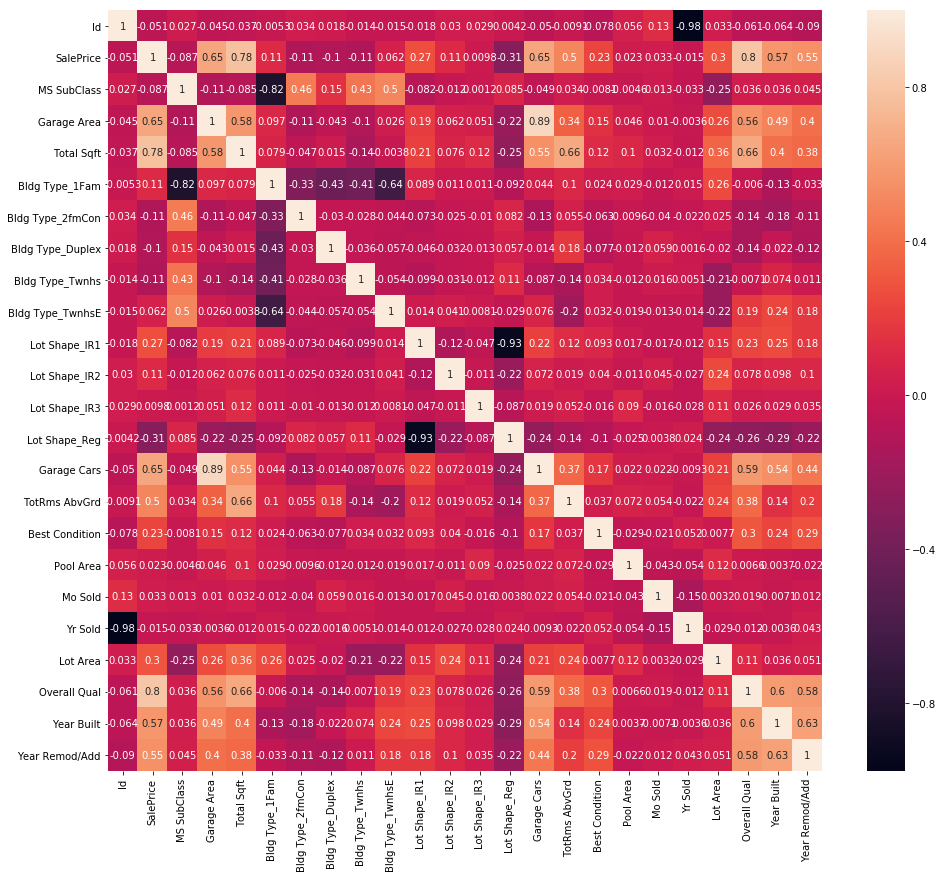

In [118]:
plt.figure(figsize = (16, 14))
sns.heatmap(df.corr(), annot = True);

So, based on this heatmap I will use a couple of these variables for feature engineering. Overall Quality, Year Built, Year Remodel/Add, Total Rooms above grade, Garage Cars, Total square feet, Lot Area, and Garage Area all have the most significant correlation with SalesPrice. 

# Generating Features

In [119]:
features = ['Year Remod/Add', 'Year Built', 'Overall Qual', 
            'TotRms AbvGrd', "Garage Cars", 'Total Sqft', 'Garage Area', 'Lot Area', 'Id']

X = train[features]
y= train['SalePrice']

In [120]:
features = ['Year Remod/Add', 'Year Built', 'Overall Qual', 
            'TotRms AbvGrd', "Garage Cars", 'Total Sqft', 'Garage Area', 'Lot Area', 'Id']

In [121]:
X_kaggle = test[features]

In [122]:
X_kaggle.shape

(879, 9)

In [123]:
test.shape

(879, 85)

# Baseline for our model

In [124]:
#Instantiate the model
lr = LinearRegression()

my R2 score, before scaling or anything else, is 77.8%

In [125]:
#This is my baseline score. 
cross_val_score(lr, X, y, cv = 5).mean()

0.7856181672707786

# Set train test split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

In [127]:
#Scale the data
ss = StandardScaler()
ss.fit(X_train)

/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [180]:
X_train_scaled.shape

(1538, 9)

In [181]:
X_test_scaled.shape

(879, 9)

In [128]:
#Fit and transform the data
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_kaggle)

/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Cross Validation

In [129]:
lr = LinearRegression()
lasso = LassoCV(cv = 5)
ridge = RidgeCV(cv = 5)

In [130]:
#Linear Reg
cross_val_score(lr, X_train_scaled, y_train, cv = 5).mean()

0.7874351446289518

In [131]:
#Lasso
cross_val_score(lasso, X_train_scaled, y_train, cv = 5).mean()

0.7876716460575264

In [132]:
#Ridge
cross_val_score(ridge, X_train_scaled, y_train, cv = 5).mean()

0.7881425938914309

Lasso is our best scoring model. 

# Evaluate our models

In [133]:
lasso.fit(X_train_scaled, y_train);

In [134]:
lasso.alpha_

1568.5913934322625

In [135]:
#train score
lasso.score(X_train_scaled, y_train).mean()

0.8009405275741017

In [104]:
pred = lasso.predict(X_test_scaled)

CV is 78.8%

Train score is 80.1%

All three are pretty good, which means the model is alright. 

# Submitting my model

In [182]:
X_test_scaled.shape

(879, 9)

In [183]:
X_test.shape

(513, 9)

In [184]:
submission = X_kaggle['Id']

In [185]:
submission = pd.DataFrame(submission)

In [186]:
type(submission)

pandas.core.frame.DataFrame

In [187]:
submission['SalePrice'] = pred

In [188]:
submission.set_index('Id', inplace=True)
submission.head()

,SalePrice
Id,
2658,169843.010721
2718,213597.506726
2414,202168.964557
1989,133785.438197
625,181930.961328


In [189]:
submission.to_csv('./datasets/submission.csv')